<a href="https://colab.research.google.com/github/vavana619/quant_machine/blob/main/%5B6%EC%9E%A5%5D_%EC%9A%B0%EB%9F%89%EC%A3%BC%EB%A5%BC_%EC%B0%BE%EB%8A%94_%EA%B8%B0%EC%88%A0_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 투자 효율이 좋은 기업, ROA(자산대비이익)와 ROE(자본대비이익)

## [ROA(자산대비이익)]
: 회사가 가진 **총자산을 이용해 얼마나 벌어왔는지 그 수익률을 파악**할 수 있게 하는 지표 (ROA가 0.1이라면 10% 수익을 만들었다는 뜻)

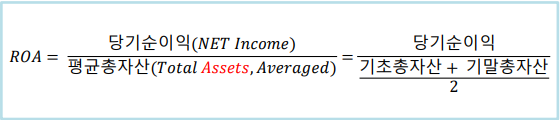


## [ROE(자본대비이익)]
: ROA와 같은 개념이나 자산 대신 *자본(순자산)*으로 산출

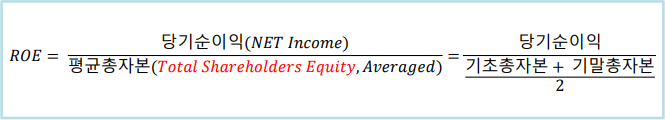

* ROA와 ROE의 차이 : 기업이 **레버리지(부채)를 얼마나 잘 활용**하는지 보여줌
-> **레버리지** : '지레 효과'로 차입금을 통해 *자신이 가진 자본에 비해 훨씬 높은 이익*을 올릴 수 있는 효과 (빛 내서 돈 번다)

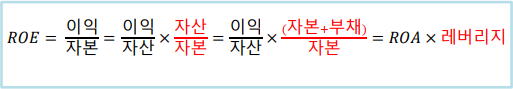

In [2]:
pip install finterstellar

     |████████████████████████████████| 109 kB 8.5 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [1]:
import finterstellar as fs
OTP = '16500881341189711897'

In [ ]:
df = fs.fn_single(otp=OTP, symbol='BABA', window='T') # 알리바바(BABA) 재무제표 데이터 불러오기

* ROA를 계산하려면 당기순이익(Net Income)과 총자산(Total Assets)이 필요
* ROE를 계산하려면 당기순이익(Net Income)과 총자본(Shareholders Equity)이 필요

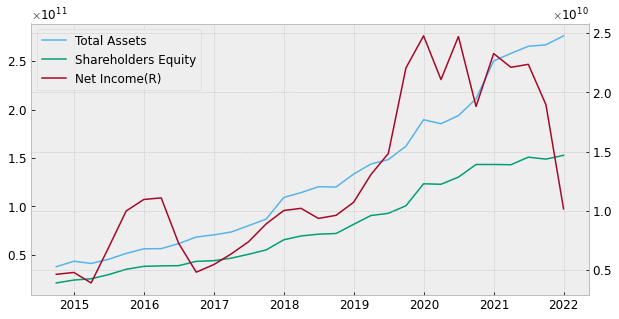

In [ ]:
fs.draw_chart(df, left=['Total Assets', 'Shareholders Equity'], right='Net Income') # 꾸준히 성장해왔는데 2020년부터 수익은 조금 주춤함

## 1) ROA 계산

In [ ]:
df['Total Assets'].shift(4).tail() # 전년도 총자산 (전년도 데이터를 현 분기에 매핑시키기 위해 4를 입력하여 행을 일치시킴)

2020-12-31    1.895340e+11
2021-03-31    1.854290e+11
2021-06-30    1.937940e+11
2021-09-30    2.111500e+11
2021-12-31    2.501797e+11
Name: Total Assets, dtype: float64

In [ ]:
df['Total Assets'].tail() # 전년 뎅이터가 옮겨진 것을 확인할 수 있음

2020-12-31    2.501797e+11
2021-03-31    2.580066e+11
2021-06-30    2.653184e+11
2021-09-30    2.668670e+11
2021-12-31    2.761150e+11
Name: Total Assets, dtype: float64

In [ ]:
df['Shfted Total Assets'] = df['Total Assets'].shift(4) # 4분기전 Total Assets

In [ ]:
df['Avg Assets'] = (df['Total Assets'] + df['Total Assets'].shift(4)) / 2 # 4분기전 Total Assets과 이번분기 Total Assets 평균값

In [ ]:
df[['Total Assets', 'Shfted Total Assets', 'Avg Assets']]

,Total Assets,Shfted Total Assets,Avg Assets
2014-09-30,3.785300e+10,NaN,NaN
2014-12-31,4.351500e+10,NaN,NaN
2015-03-31,4.120600e+10,NaN,NaN
2015-06-30,4.549400e+10,NaN,NaN
2015-09-30,5.157000e+10,3.785300e+10,4.471150e+10
2015-12-31,5.629600e+10,4.351500e+10,4.990550e+10
2016-03-31,5.652100e+10,4.120600e+10,4.886350e+10
2016-06-30,6.168800e+10,4.549400e+10,5.359100e+10
2016-09-30,6.844100e+10,5.157000e+10,6.000550e+10
2016-12-31,7.069900e+10,5.629600e+10,6.349750e+10


### ROA = 당기순이익 / 평균총자산

In [ ]:
df['ROA'] = df['Net Income'] / df['Avg Assets']

In [ ]:
df[['ROA', 'Net Income', 'Avg Assets']].tail()

,ROA,Net Income,Avg Assets
2020-12-31,0.105897,2.328213e+10,2.198569e+11
2021-03-31,0.099752,2.211686e+10,2.217178e+11
2021-06-30,0.097436,2.236709e+10,2.295562e+11
2021-09-30,0.079321,1.895845e+10,2.390085e+11
2021-12-31,0.038615,1.016148e+10,2.631474e+11


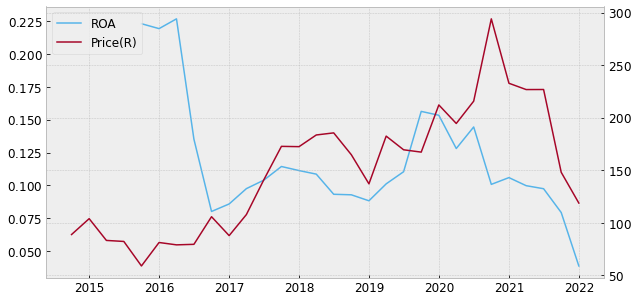

In [ ]:
fs.draw_chart(df, left='ROA', right='Price') # ROA와 주가가 연관이 높아 보이지 않음 (크게 연동 X)

## 2) ROE 계산

### ROE = 당기순이익 / 평균총자본

In [ ]:
df['Avg Equity'] = (df['Shareholders Equity'] + df['Shareholders Equity'].shift(4)) / 2
df['ROE'] = df['Net Income'] / df['Avg Equity']
df[['ROE', 'Net Income', 'Avg Equity']].tail()

,ROE,Net Income,Avg Equity
2020-12-31,0.174530,2.328213e+10,1.333986e+11
2021-03-31,0.166261,2.211686e+10,1.330251e+11
2021-06-30,0.159077,2.236709e+10,1.406051e+11
2021-09-30,0.129748,1.895845e+10,1.461171e+11
2021-12-31,0.068619,1.016148e+10,1.480849e+11


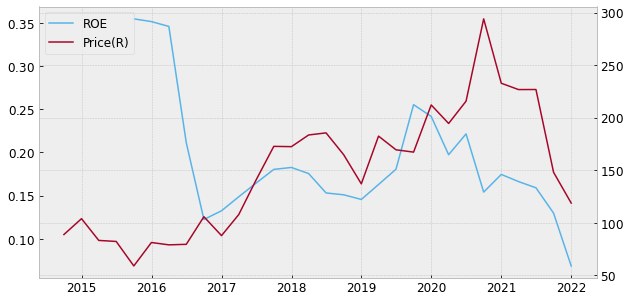

In [ ]:
fs.draw_chart(df, left='ROE', right='Price') # ROE 역시 주가와 밀접하게 움직이지 않음

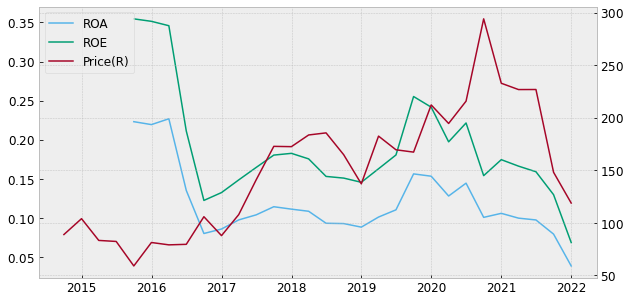

In [ ]:
fs.draw_chart(df, left=['ROA', 'ROE'], right='Price') # 셋 다 함께 그려봐도 별다른 인사이트가 보이지 않음

## 3) 백테스팅
* ROA와 ROE는 투자 효율을 의미하니 높을수록 좋음
* 분기별로 ROA 값이 높은 상위 종목에 투자하는 전략을 테스트

In [ ]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp=OTP, term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


* 평균총자산을 구하고, 이를 이용해 ROA를 계산
* quaarters_before() 함수를 이용해 prev_t라는 변수에 4분기 전 값을 받아오기
* 예외처리 -> 어떤 분기(t)의 ROA를 구하는 요소인 'Net Income', 'Avg Assets', 'Total Assets' 중에 하나라도 0이하면 ROA를 해당 분기의 ROA는 nan으로 처리

In [ ]:
for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2
  data[t]['ROA'] = data[t]['Net Income'] / data[t]['Avg Assets']
  data[t].loc[(data[t]['Net Income'] < 0) | (data[t]['Avg Assets'] < 0) | (data[t]['Total Assets'] < 0), 'ROA'] = float('nan')

분기별로 *ROA 값 상위 30개* 종목을 선정 -> **fn_filter()** 함수를 이용해 *내림차순*으로 종목을 선정

In [ ]:
s = {}
signal = {}

for t in terms:
  s[t] = fs.fn_filter(data[t], by='ROA', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index) # 종목

In [ ]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001) # 백테스팅 -> 좋지 않은 결과

CAGR: 5.42%
Accumulated return: 69.61%
Investment period: 10.0yrs
Sharpe ratio: 0.32
MDD: -28.02%


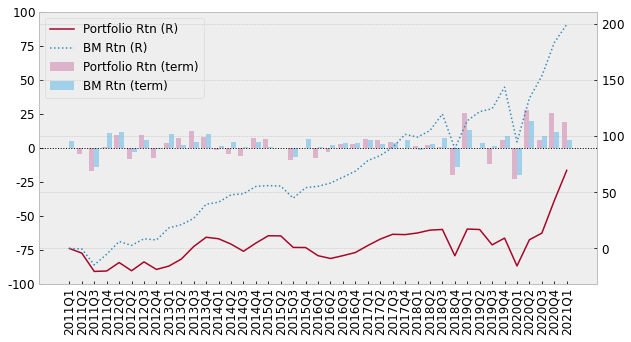

In [ ]:
fs.draw_return(df) # 기간별 수익률 그래프

분기별로 *ROE 값 상위 30개* 종목을 선정

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 8.48%
Accumulated return: 125.79%
Investment period: 10.0yrs
Sharpe ratio: 0.64
MDD: -27.03%


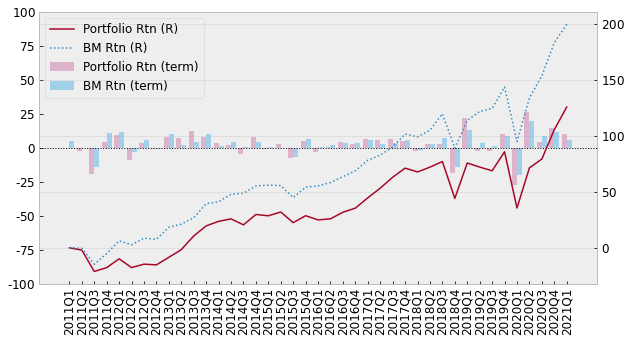

In [ ]:
# ROE 코드 모아보기
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp=OTP, term=t)

s = {}
signal = {}

for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Equity'] = (data[t]['Shareholders Equity'] + data[prev_t]['Shareholders Equity']) / 2
  data[t]['ROE'] = data[t]['Net Income'] / data[t]['Avg Equity']
  data[t].loc[(data[t]['Net Income'] < 0) | (data[t]['Avg Equity'] < 0) | (data[t]['Shareholders Equity'] < 0), 'ROE'] = float('nan')
  
  s[t] = fs.fn_filter(data[t], by='ROE', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

* ROA보다 성과가 개선된 모습
* ROA와 ROE는 기업의 수익률을 나타내는 중요한 지표지만, 백테스트 결과 ROA나 ROE를 단독으로 투자 전략으로 사용하기에는 수익률 측면에서 다소 아쉬움이 있는 지표

# 2. 회계사가 유행시킨 장기투자 전략, RIM(잔여이익모델)
: 기업이 창출한 초과이익(잔여이익)을 내 **목표수익률**과 비교해서 기업의 주가를 산정하는 방식

* 초과이익 : 목표 수익률 이상으로, 벌어온 돈에서 목표 수익률을 뺀 값
  * 초과이익 = 이익 - 자본조달비용
  * 기업가치 = 자본 + 초과이익

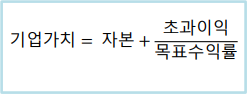


* 주당순자산(BPS: Book value Per Share)은 PBR을 구할 때와 같이 재무제표의 자본을 주식수로 나누어 계산하고, 자본 이익률 ROE는 당기순이익을 자본으로 나눈 값
(아래 이미지에서 빨간 박스부분 +가 아니고 *)
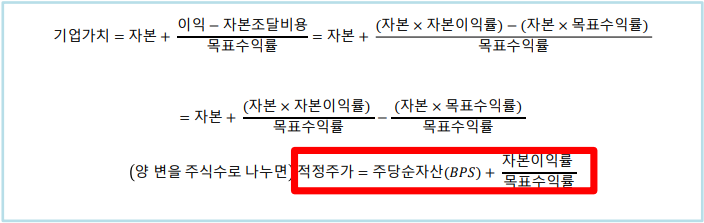

In [ ]:
df = fs.fn_single(otp=OTP, symbol='JPM', window='T') # JP모건(JPM) 재무제표 데이터 불러오기

In [ ]:
df['BPS'] = df['Shareholders Equity'] / df['Shares']
df['ROE'] = df['Net Income'] / df['Shareholders Equity']

In [ ]:
# 매 분기 바뀌는 수치이기 때문에 조금이라도 더 안정적인 ROE를 구하기 위해 ROE 값이 3년간 이동평균을 이용
df['ROE3AVG'] = df['ROE'].rolling(12).mean() # 3년 = 12분기

In [ ]:
# 목표 수익률을 10%로 설정해 적정주가를 계산
df['RIM'] = df['BPS'] * df['ROE3AVG'] / .1

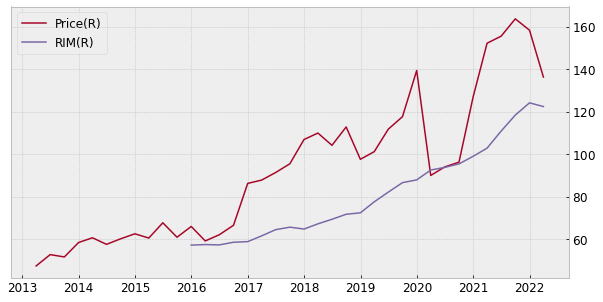

In [ ]:
fs.draw_chart(df, right=['Price', 'RIM']) # 계산한 적정주가를 실제 주가와 차트로 비교

* 2020년 적정주가와 비슷한 수준까지 근접했던 주가가 다시 팬데믹 이전 수준으로 회복됨
* 목표 수익률을 10% 이상으로 바라보고 있음

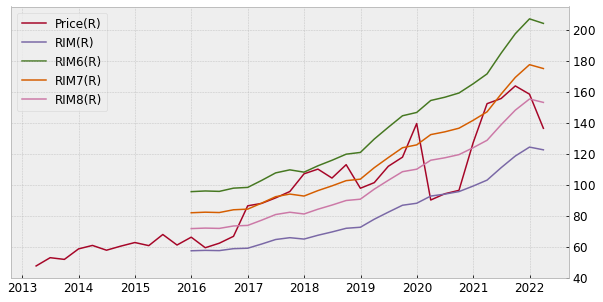

In [ ]:
# 현재 주가 수준은 기대수익률이 몇 % 수준인지 밴드를 그려서 찾아보기
# 목표 수익률을 각각 6%, 7%, 8%로 잡아 RIM 적정주가를 산출해 주가와 비교
df['RIM6'] = df['BPS'] * df['ROE3AVG'] / .06
df['RIM7'] = df['BPS'] * df['ROE3AVG'] / .07
df['RIM8'] = df['BPS'] * df['ROE3AVG'] / .08
fs.draw_chart(df, right=['Price', 'RIM', 'RIM6', 'RIM7', 'RIM8'])

-> 2021년 초 주가는 주황색 그래프인 RIM 7% 그래프와 근접해있는 모습이 모임 (최근 3년간 JPM의 ROE 수준이 꾸준히 유지된다고 가정할 경우 7%의 수익을 기대하고 들어가는 것)

### [백테스트]
: 산출한 적정주가보다 실제 주가가 낮으면 (주가 < 적정주가) 주가가 저평가된 상태로 판단하여 매수하고 그렇지 않으면 매도하는 전략

* 중간 데이터로 필요한 BPS와 ROE를 계산하고 RIM 값을 계산
* *3년 평균 ROE를 산출*하기 위해 **평균자본**이 필요 -> 1년전, 2년전 값을 불러오고 기존에 당해년도 값으로 평균값을 구하기
* 예외처리를 해주고 계산된 BPS와 3년 평균  ROE 값으로 RIM을 산출
* *적정주가와 실제 주가를 비교*하기 위해 주가를 정정주가로 나누어 **P/RIM 컬럼**을 생성

In [ ]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp=OTP, term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [ ]:
for t in terms:
  t_1 = fs.quarters_before(terms, t, 4) # 1년전 값
  t_2 = fs.quarters_before(terms, t, 8) # 2년전 값
  data[t]['BPS'] = data[t]['Shareholders Equity'] / data[t]['Shares']
  data[t]['Avg Equity'] = (data[t]['Shareholders Equity'] + data[t_1]['Shareholders Equity']) / 2
  data[t]['ROE'] = data[t]['Net Income'] / data[t]['Avg Equity']
  data[t].loc[(data[t]['Net Income'] < 0) | (data[t]['Avg Equity'] < 0) | (data[t]['Shareholders Equity'] < 0), 'ROE'] = float('nan')
  data[t]['Avg ROE'] = (data[t]['ROE'] + data[t_1]['ROE'] + data[t_2]['ROE']) / 3 # 3년 평균 ROE
  data[t]['RIM'] = data[t]['BPS'] * data[t]['Avg ROE'] / .1
  data[t]['P/RIM'] = data[t]['Price_M3'] / data[t]['RIM']

* **P/RIM > 1이면 주가가 적정주가보다 높으니 고평가, P/RIM < 1이면 저평가 상태**
* 주가는 분기 말 기준 3개월 후 주가인 Price_M3를 사용 (리밸런싱도 3개월 후에 할 계획)
* **저평가**된 종목을 찾기 위해 fn_filter() 함수를 사용해 *P/RIM이 낮은 30개* 종목을 선정

In [ ]:
s = {}
signal = {}

for t in terms:
  s[t] = fs.fn_filter(data[t], by='P/RIM', floor=0, cap=1, n=30, asc=True)
  signal[t] = list(s[t].index) # 종목

In [ ]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 7.68%
Accumulated return: 109.72%
Investment period: 10.0yrs
Sharpe ratio: 0.39
MDD: -45.83%


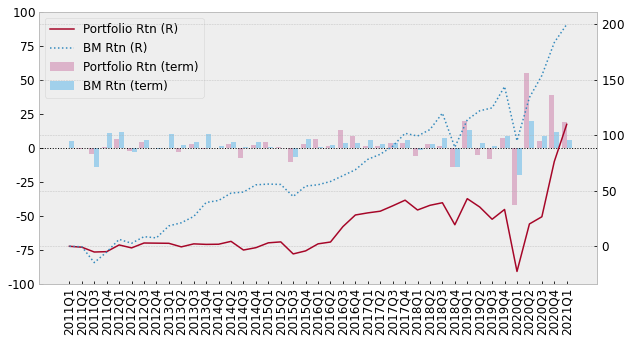

In [ ]:
fs.draw_return(df) # 수익률 추이 그래프

# 3. 영업 효율이 좋은 기업, GP/A

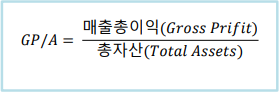

* 매출총이익(Gross Prifit) = 매출액(Revenue) - 매출원가(Cost of Revenue)
* 노비막스는 Gross Prifit에서 R&D비용이나 판매비와 관리비 등을 빼게 되면 기업이 이익 수치를 좋게 만들기 위해 실질 실적을 오염시킬 수 있다고 한다.

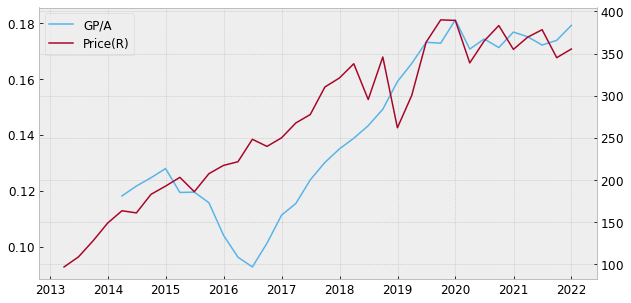

In [ ]:
df = fs.fn_single(otp=OTP, symbol='LMT', window='T') # 록히드마틴(LMT) 재무제표 데이터 불러오기
df['Avg Assets'] = (df['Total Assets'] + df['Total Assets'].shift(4)) / 2
df['GP/A'] = df['Gross Profit'] / df['Avg Assets']
fs.draw_chart(df, left='GP/A', right='Price') # 차트만 봐서는 둘 사이의 연관성이 커 보이지 않음

## 1) GP/A는 ROA 대체용으로 개발된 지표이니 GP/A와 ROA를 비교
* GP/A와 ROA는 같은 방향으로 움직이는 것이 정상인데 2018년에 유독 다르게 움직였음
  * 2017년에 세금을 몰아서 낸 기록이 있음
  * 트레이딩 데이터를 사용하기 때문에 2017년에 낸 세금의 영향이 2018년까지 이어짐

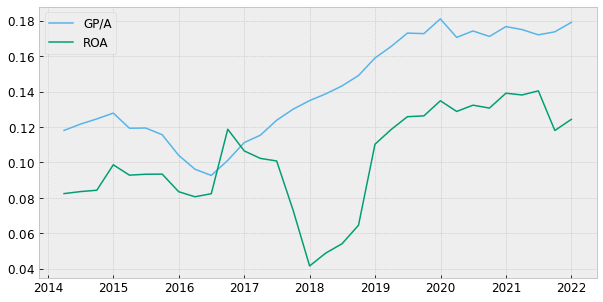

In [ ]:
df['ROA'] = df['Net Income'] / df['Avg Assets']
fs.draw_chart(df, left=['GP/A', 'ROA'])

## 2) 백테스트
* *GP/A는 ROA와 같이 높을수록 좋음*
* 분기별로 **GP/A 값이 높은 상위 종목에 투자**하는 전략을 테스트

In [ ]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp=OTP, term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


GP/A에도 자산총계를 기초값과 기말값 평균으로 넣어야 하기 때문에 *전년도의 자산총계값을 가져와* 기초값으로 이용

In [ ]:
for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2
  data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets']
  data[t].loc[(data[t]['Gross Profit'] < 0) | (data[t]['Avg Assets'] < 0) | (data[t]['Total Assets'] < 0), 'GP/A'] = float('nan')

**GP/A 기준**으로 내림차순으로 30개 종목을 선정해 트레이딩 시그널 만들기

In [ ]:
s = {}
signal = {}

for t in terms:
  s[t] = fs.fn_filter(data[t], by='GP/A', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

In [ ]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 13.51%
Accumulated return: 255.59%
Investment period: 10.0yrs
Sharpe ratio: 0.97
MDD: -38.03%


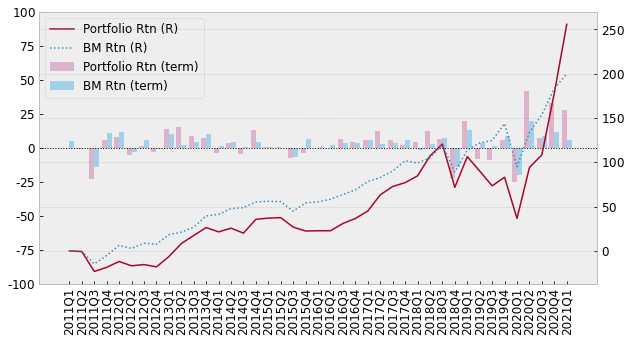

In [ ]:
fs.draw_return(df)

* GP/A만 단독으로 사용했음에도 불구하고 훌륭한 성과
* 2018년 하반기와 2020년 초의 하락장 분위기를 피하지는 못했어도, 방어를 잘함
* ROA와 비교해 살짝 변형한 GP/A에 수익률이 확 달라짐 (지표가 여전히 유효하다는 것이 눈에 보임)

노비막스는 가치주 지표와 GP/A를 결합하면 수익률을 개선하고 변동성을 줄일 수 있다고 함

### <가치주 지표와 GP/A를 합성해 투자하는 전략을 테스트>
1. 비교를 위해 *PER만 단독으로 테스트*를 시행

In [2]:
# PER 코드 모아보기
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp=OTP, term=t)

s = {}
signal = {}

for t in terms:
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']

  s[t] = fs.fn_filter(data[t], by='PER', floor=1, cap=10, n=30, asc=True)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 5.04%
Accumulated return: 63.57%
Investment period: 10.0yrs
Sharpe ratio: 0.22
MDD: -54.14%


2. **합성전략**을 테스트
* PER와 GP/A 결합은 큰 의미를 주지 못함
* GP/A가 이익에 대한 평가를 하고 있고, PER 역시 이익에 대한 평가를 하고 있어 *중복되는 부분*이 있음

CAGR: 4.70%
Accumulated return: 58.35%
Investment period: 10.0yrs
Sharpe ratio: 0.19
MDD: -58.25%


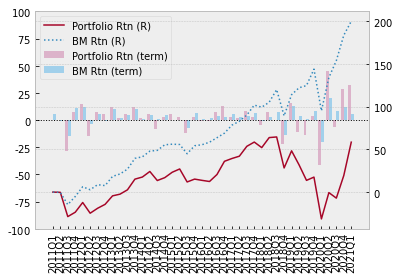

In [3]:
# GP/A + PER 코드 모아보기
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#   data[t] = fs.fn_consolidated(otp=OTP, term=t)
s = {}
s1 = {}
s2 = {}
signal = {}

for t in terms:
  # GP/A
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2
  data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets']
  data[t].loc[(data[t]['Gross Profit'] < 0) | (data[t]['Avg Assets'] < 0) | (data[t]['Total Assets'] < 0), 'GP/A'] = float('nan')

  # PER
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']

  s1[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, cap=10, asc=True)
  s2[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=0, asc=False)
  s[t] = fs.combine_score(s1[t], s2[t], n=30)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

3. PBR 단독 성과

CAGR: 37.04%
Accumulated return: 2241.29%
Investment period: 10.0yrs
Sharpe ratio: 4.51
MDD: -40.36%


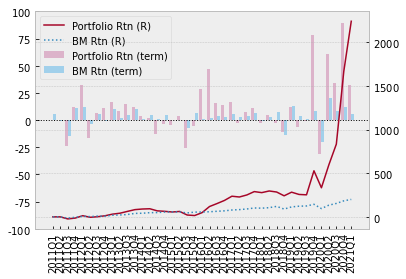

In [4]:
# PBR 코드 모아보기
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#   data[t] = fs.fn_consolidated(otp=OTP, term=t)

s = {}
signal = {}

for t in terms:
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares'])

  s[t] = fs.fn_filter(data[t], by='PBR', floor=0.1, cap=1, n=30, asc=True)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

-> 단독으로 사용해도 성과 훌륭함

4. PBR과 GP/A를 합성해 백테스트

CAGR: 22.29%
Accumulated return: 649.46%
Investment period: 10.0yrs
Sharpe ratio: 1.57
MDD: -50.37%


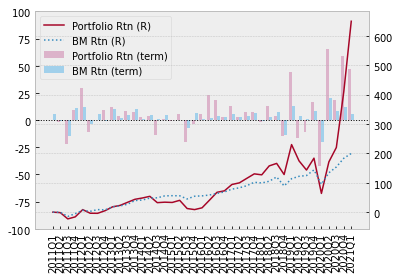

In [5]:
# GP/A + PBR 코드 모아보기
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#   data[t] = fs.fn_consolidated(otp=OTP, term=t)
s = {}
s1 = {}
s2 = {}
signal = {}

for t in terms:
  # GP/A
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2
  data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets']
  data[t].loc[(data[t]['Gross Profit'] < 0) | (data[t]['Avg Assets'] < 0) | (data[t]['Total Assets'] < 0), 'GP/A'] = float('nan')

  # PBR
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares'])

  s1[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=0.1, cap=1, asc=True)
  s2[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=0, asc=False)
  s[t] = fs.combine_score(s1[t], s2[t], n=30)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

-> 수익률이 좋았던 지표라 수익률의 개선은 없었음 (아무리 훌륭한 지표들이라도 그 둘을 섞었을 때 더 나은 성과를 내주리라는 보장은 없을 것)